In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_xls = pd.read_excel('ENB2012_data.xlsx', 'Sheet1', index_col=None)
data = data_xls.to_csv('csvfile.csv', encoding='utf-8')

In [2]:
clean_data=data_xls.dropna()
print(clean_data.head(20))
data_xls.dtypes

      X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0   0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1   0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2   0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3   0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4   0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
5   0.90  563.5  318.5  122.50  7.0   3  0.0   0  21.46  25.38
6   0.90  563.5  318.5  122.50  7.0   4  0.0   0  20.71  25.16
7   0.90  563.5  318.5  122.50  7.0   5  0.0   0  19.68  29.60
8   0.86  588.0  294.0  147.00  7.0   2  0.0   0  19.50  27.30
9   0.86  588.0  294.0  147.00  7.0   3  0.0   0  19.95  21.97
10  0.86  588.0  294.0  147.00  7.0   4  0.0   0  19.34  23.49
11  0.86  588.0  294.0  147.00  7.0   5  0.0   0  18.31  27.87
12  0.82  612.5  318.5  147.00  7.0   2  0.0   0  17.05  23.77
13  0.82  612.5  318.5  147.00  7.0   3  0.0   0  17.41  21.46
14  0.82  612.5  318.5  147.00  7.0   4  0.0   0  16.95

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [4]:
clean_data['WindowToWallRatio'] = clean_data['X7'] / clean_data['X3']
print(f"New column 'WindowToWallRatio' added. Sample data:\n{clean_data[['X7', 'X3', 'WindowToWallRatio']].head()}\n")

New column 'WindowToWallRatio' added. Sample data:
    X7     X3  WindowToWallRatio
0  0.0  294.0                0.0
1  0.0  294.0                0.0
2  0.0  294.0                0.0
3  0.0  294.0                0.0
4  0.0  318.5                0.0



In [5]:
from sklearn.preprocessing import StandardScaler
X = clean_data[['X1', 'X3', 'X5', 'X7','WindowToWallRatio']]
y1 = clean_data['Y1']
y2 = clean_data['Y2']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X_scaled, y2, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y1_train)
y1_pred = lr.predict(X_test)
mae = mean_absolute_error(y1_test, y1_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2 = r2_score(y1_test, y1_pred)
print(f"Linear Regression - y1: MAE={mae}, RMSE={rmse}, R2={r2}")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y1_train)
y1_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y1_test, y1_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y1_test, y1_pred_rf))
r2_rf = r2_score(y1_test, y1_pred_rf)

print(f"Random Forest - y1: MAE={mae_rf}, RMSE={rmse_rf}, R2={r2_rf}")

Linear Regression - y1: MAE=2.2953992214890038, RMSE=3.094244651236173, R2=0.9081442132281958
Random Forest - y1: MAE=0.37550541324851044, RMSE=0.5024884823420074, R2=0.9975775799808709


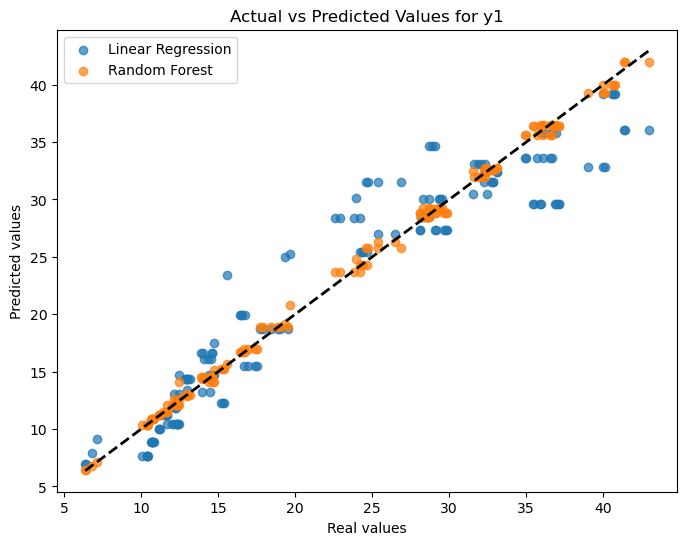

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred, alpha=0.7, label='Linear Regression')
plt.scatter(y1_test, y1_pred_rf, alpha=0.7, label='Random Forest')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2)
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.legend()
plt.title("Actual vs Predicted Values for y1")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y2_train)
y2_pred = lr.predict(X_test)
mae2 = mean_absolute_error(y2_test, y2_pred)
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r22 = r2_score(y2_test, y2_pred)
print(f"Linear Regression - y2: MAE={mae2}, RMSE={rmse2}, R2={r22}")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y2_train)
y2_pred_rf = rf.predict(X_test)
mae2_rf = mean_absolute_error(y1_test, y2_pred_rf)
rmse2_rf = np.sqrt(mean_squared_error(y2_test, y2_pred_rf))
r22_rf = r2_score(y2_test, y2_pred_rf)
print(f"Random Forest - y2: MAE={mae2_rf}, RMSE={rmse2_rf}, R2={r22_rf}")

Linear Regression - y2: MAE=2.2168877472257376, RMSE=3.1803512146674215, R2=0.8908381666480136
Random Forest - y2: MAE=2.3609662626553622, RMSE=1.7478174561674973, R2=0.9670304666563787


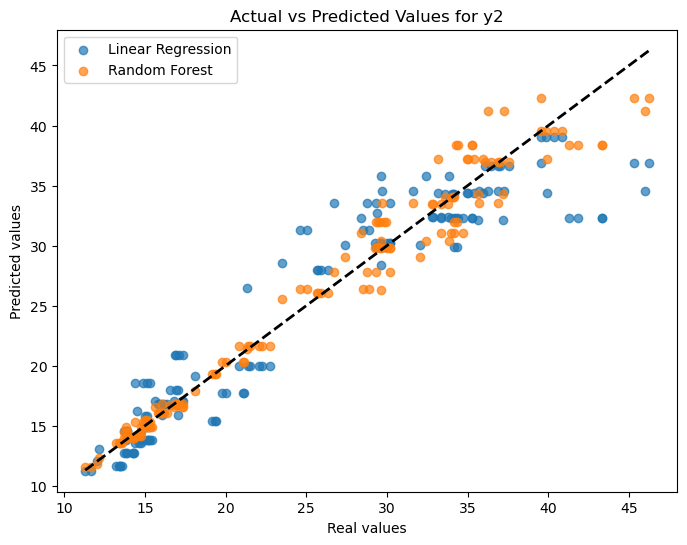

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred, alpha=0.7, label='Linear Regression')
plt.scatter(y2_test, y2_pred_rf, alpha=0.7, label='Random Forest')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--', lw=2)
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.legend()
plt.title("Actual vs Predicted Values for y2")
plt.show()